# ACC_PID_Simulation

## Import Libararies


In [103]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Vehicle Class

In [104]:
class vehicle:
    def __init__ (self, initial_position, initial_speed):
        self.position = initial_position
        self.speed = initial_speed
    
    def update_position (self, acceleration, dt):
        self.speed = self.speed + acceleration *dt 
        self.position = self.position + self.speed *dt

        

## ACC Class

In [105]:
class ACC_Trip:

    def __init__ (self, kp, ki, kd, saftey_distance):

        self.kp = kp
        self.kd = kd
        self.ki = ki
        self.saftey_distance = saftey_distance
        self.previous_error = 0
        self.integral = 0
    
    def accleration_computing (self, distance, relative_velocity, dt ): 

        # calculation of PID controller
        error = self.saftey_distance - distance

       
        if error <= 0:

         self.kp = 0
         self.ki = 0
         self.kd = 0
      
        
        self.integral = self.integral + (error + self.previous_error)/2 *dt
        derivative =  (error - self.previous_error)/dt
        self.previous_error = error 
        
        return self.kp* error + self.ki * self.integral + self.kd* derivative
     


## simulation parameters


In [106]:
simulation_time = 10
dt = 0.1
steps = int(simulation_time/dt)

## vehicles definition

In [107]:
# we have 2 vehicles a lead and a following

lead_vehicle = vehicle(20, 50) #speed in m/s
following_vehicle = vehicle(15,50) #speed in m/s


## ACC definition

In [108]:
# acc = ACC_Trip (-0.5, 0.1, 0.05, 10)
acc = ACC_Trip (-1, 0.1, 0.05, 10)
#acc = ACC_Trip (-0.5, 0.1, 0.01, 10)


## arrays initiallization


In [109]:
lead_positions = []
following_positions = []
distances = []
following_velocity = []
following_acceleration = []
errortoprint = []

In [110]:


np.set_printoptions(precision=2)

for i in range(steps):
    distance = lead_vehicle.position - following_vehicle.position
    relative_velocity = lead_vehicle.speed - following_vehicle.speed
    acceleration = acc.accleration_computing(distance, relative_velocity,dt)

    lead_vehicle.update_position(0, dt)
    following_vehicle.update_position(acceleration,dt)

    #append Data
    errortoprint.append (acc.previous_error)
    lead_positions.append(lead_vehicle.position)
    following_positions.append(following_vehicle.position)
    distances.append(distance)
    following_velocity.append(following_vehicle.speed)
    following_acceleration.append(acceleration)
    

In [111]:
print(distances)

[5, 5.024750000000001, 5.0986274875, 5.220645493936875, 5.389340505490011, 5.602789456369436, 5.858631233261072, 6.154092453560551, 6.486017238466253, 6.850900663436754, 7.244925533317769, 7.664002097944888, 8.103810296527115, 8.559844095868144, 9.027457468697975, 9.501911544233977, 9.978422453684956, 10.452209388825892, 10.925996323966828, 11.399783259107764, 11.8735701942487, 12.347357129389636, 12.821144064530571, 13.294930999671507, 13.768717934812443, 14.242504869953393, 14.716291805094329, 15.190078740235265, 15.6638656753762, 16.137652610517137, 16.611439545658072, 17.085226480799008, 17.559013415939944, 18.03280035108088, 18.506587286221816, 18.98037422136275, 19.454161156503687, 19.927948091644623, 20.40173502678556, 20.875521961926495, 21.34930889706743, 21.823095832208367, 22.296882767349302, 22.77066970249024, 23.244456637631174, 23.71824357277211, 24.192030507913046, 24.66581744305398, 25.139604378194917, 25.613391313335853, 26.08717824847679, 26.560965183617725, 27.034752

In [112]:
print(following_acceleration)

[-2.4749999999999996, -4.9127487499999996, -4.814051893687499, -4.667700511626247, -4.475393932628376, -4.239282601221392, -3.9619443407840147, -3.6463564606225654, -3.2958640064801084, -2.9141444910515224, -2.505169474609537, -2.0731633955117834, -1.6225600758794703, -1.1579573488798185, -0.6840702706172193, -0.20568339149896242, 0.27239743100493374, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]


In [113]:
print(following_velocity)

[49.7525, 49.261225124999996, 48.779819935631245, 48.31304988446862, 47.86551049120578, 47.44158223108364, 47.04538779700524, 46.680752150942986, 46.351165750294975, 46.05975130118982, 45.80923435372887, 45.60191801417769, 45.43966200658974, 45.32386627170176, 45.255459244640036, 45.23489090549014, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 45.262130648590635, 

## Plot Results


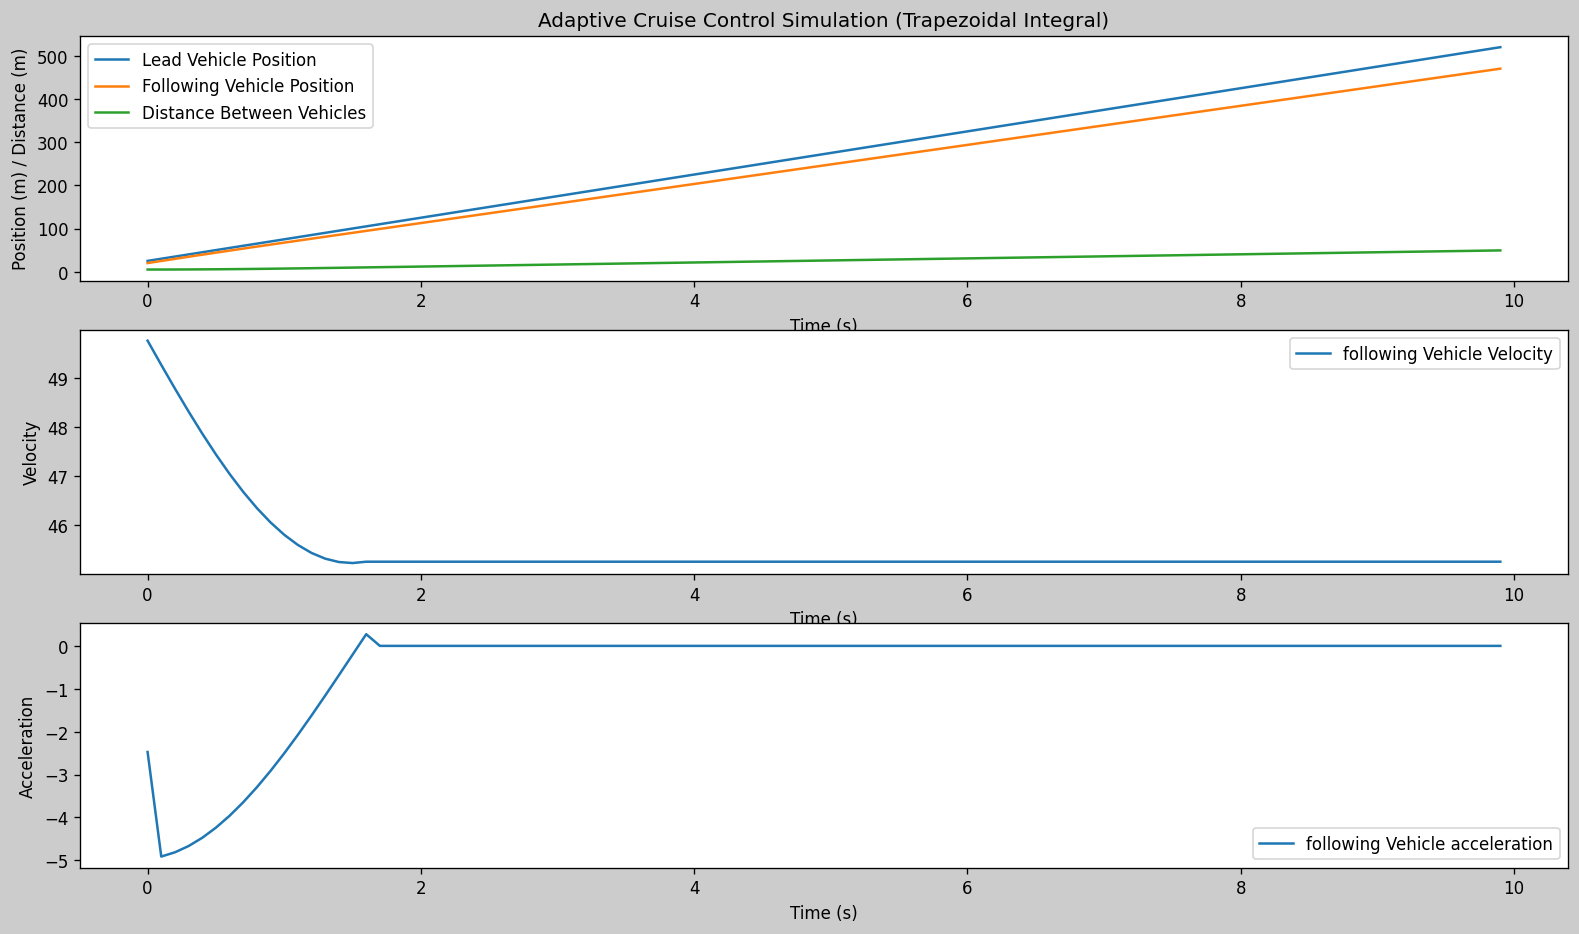

In [114]:
fig = plt.figure(figsize=(16,9),dpi=120,facecolor=(0.8,0.8,0.8))
gs=gridspec.GridSpec(3,1)

fig_1 = fig.add_subplot(gs[0,0])
plt.plot(np.arange(steps) * dt, lead_positions, label='Lead Vehicle Position')
plt.plot(np.arange(steps) * dt, following_positions, label='Following Vehicle Position')
plt.plot(np.arange(steps) * dt, distances, label='Distance Between Vehicles')
plt.xlabel('Time (s)')
plt.ylabel('Position (m) / Distance (m)')
plt.legend()
plt.title('Adaptive Cruise Control Simulation (Trapezoidal Integral)')

fig_2 = fig.add_subplot(gs[1,0])
plt.plot(np.arange(steps) * dt, following_velocity, label='following Vehicle Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity')
plt.legend()

fig_2 = fig.add_subplot(gs[2,0])
plt.plot(np.arange(steps) * dt, following_acceleration, label='following Vehicle acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.legend()



plt.show()

